# Wartości Shapleya

### Motywacja

Chcielibyśmy zrozumieć predykcje modelu poprzez określenie w jakim stopniu dane zmienne objaśniające na nie wpłynęły. 
Rozważmy przykład zwykłej regresji liniowej:
$$\widehat{f}(\mathbf{x}_i)=\beta_0+\beta_1x_{i1}+\ldots\beta_px_{ip}$$
Wpływ $j$-tej zmiennej objaśniającej na predykcję $\widehat{f}(\mathbf{x}_i)$ jest całkowicie zawarty w wyrazie $\beta_jx_{ij}$. Warto, bez straty ogólności, odjąć od niego stałą taką, że średni wpływ po wszystkich obserwacjach się wyzeruje: 
$$\phi_{ij}(\widehat{f})=\beta_jx_{ij}-\mathbb{E}[\beta_jX_j]=\beta_j(x_{ij}-\mathbb{E}[X_j]).$$
Zauważmy, że
$$\sum_{j=1}^p\phi_{ij}(\widehat{f})=\widehat{f}(\mathbf{x}_i)-\mathbb{E}[\widehat{f}(X)].$$
Czy można to uogólnić na inne modele (nieliniowe)?

### Teoretyczne podstawy wartości Shapleya

Niech $S\subset\{x_{i1},\ldots,x_{ip}\}$. Wtedy przez $val_{\mathbf{x}_i}(S)$ oznaczana będzie predykcja dla wartości w zbiorze $S$ uśredniona po zmiennych pominiętych w $S$. Czyli, np. dla p=4 i $S=\{x_{i1},x_{i3}\}$:
$$val_{\mathbf{x}_i}(\{x_{i1},x_{i3}\})=\int\widehat{f}(x_{i1},X_2,x_{i3},X_4)d\mathbb{P}_{X_2,X_4}-\mathbb{E}[\widehat{f}(X)]$$

Pożądane własności funkcji $\phi_{ij}$:
1. $\sum_{j=1}^p\phi_{ij}(\widehat{f})=\widehat{f}(\mathbf{x}_i)-\mathbb{E}[\widehat{f}(X)].$
2. Jeśli $val_{\mathbf{x}_i}(S\cup\{x_{ij}\})=val_{\mathbf{x}_i}(S\cup\{x_{ik}\})$ dla wszystkich $S\subset\{x_{i1},\ldots,x_{ip}\}$/$\{x_{ij},x_{ik}\}$, to wówczas $\phi_{ij}=\phi_{ik}$.
3. Jeśli $val_{\mathbf{x}_i}(S\cup\{x_{ij}\})=val_{\mathbf{x}_i}(S)$ dla wszystkich $S\subset\{x_{i1},\ldots,x_{ip}\}$, wtedy $\phi_{ij}=0$.

**Twierdzenie** 
<br>
Jedynymi $\phi_{ij}$, które spełniają powyższe własności, są tzw. **wartości Shapleya**:
$$\phi_{ij}=\sum_{S\subset\{x_{i1},\ldots,x_{ip}\}/\{x_{ij}\}}\frac{|S|!(p-|S|-1)!}{p!}(val_{\mathbf{x}_i}(S\cup\{x_{ij}\})-val_{\mathbf{x}_i}(S)).$$

Alternatywna definicja wartości Shapleya:
$$\phi_{ij}=\frac{1}{p!}\sum_{permutacje}\left(val_{\mathbf{x}_i}(zmienne.przed.j\cup\{x_{ij}\})-val_{\mathbf{x}_i}(zmienne.przed.j)\right).$$

### Przykład wartości Shapleya dla regresji liniowej

Rozważmy model regresji liniowej. Wtedy, jak łatwo zauważyć, 
$$val_{\mathbf{x}_i}(\{x_{ij}\})=\beta_j(x_{ij}-\mathbb{E}[X_j]),\hspace{10mm}val_{\mathbf{x}_i}(\{x_{ij},x_{ik}\})=val_{\mathbf{x}_i}(\{x_{ij}\})+val_{\mathbf{x}_i}(\{x_{ik}\}),\hspace{8mm}itd.$$
<br>
Zatem 
$$val_{\mathbf{x}_i}(S\cup\{x_{ij}\})-val_{\mathbf{x}_i}(S)=val_{\mathbf{x}_i}(\{x_{ij}\})=\beta_j(x_{ij}-\mathbb{E}[X_j]).$$
<br>
Z tego wynika, że
\begin{equation}
\begin{split}
\phi_{ij}&=\sum_{S\subset\{x_{i1},\ldots,x_{ip}\}/\{x_{ij}\}}\frac{|S|!(p-|S|-1)!}{p!}(val_{\mathbf{x}_i}(S\cup\{x_{ij}\})-val_{\mathbf{x}_i}(S))\\
&=\beta_j(x_{ij}-\mathbb{E}[X_j])\sum_{S\subset\{x_{i1},\ldots,x_{ip}\}/\{x_{ij}\}}\frac{|S|!(p-|S|-1)!}{p!} \\
&=\beta_j(x_{ij}-\mathbb{E}[X_j])\sum_{S\subset\{x_{i1},\ldots,x_{ip}\}/\{x_{ij}\}}\frac{1}{\binom{p-1}{|S|}}\frac{1}{p} \\
&=\beta_j(x_{ij}-\mathbb{E}[X_j])\frac{1}{p}\sum_{k=0}^{p-1}\frac{1}{\binom{p-1}{|S|}}\cdot\binom{p-1}{|S|} \\
&=\beta_j(x_{ij}-\mathbb{E}[X_j])
\end{split}
\end{equation}

### Aproksymacje: 
1. Metoda monte carlo:
$$\widehat{\phi}_{ij}=\frac{1}{M}\sum_{m=1}^M\left(\widehat{f}(\mathbf{x}^{*+j})-\widehat{f}(\mathbf{x}^{*})\right),$$
gdzie $\widehat{f}(\mathbf{x}^{*+j})$ oznacza wartość predykcji dla wektora $\mathbf{x}_i$, ale z losową liczbą pozycji zastąpionych odpowiednimi wartościami z losowo wybranego $\mathbf{x}$ (nie licząc $j$-tej pozycji). $\widehat{f}(\mathbf{x}^{*})$ ma podobne znaczenie, z tą różnicą, że $j$-ta pozycja również może być wymieniona. 
2. KernelSHAP - znajduje $\phi$ poprzez minimalizację ważonej sumy kwadratów.
3. TreeSHAP - szybsze dla modeli drzewiastych (random forests, xgboost, etc.)

In [1]:
import pandas as pd
import numpy as np
import shap
import xgboost
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X, y = shap.datasets.boston()
lin_model = linear_model.LinearRegression()
lin_model.fit(X, y)
model_xgb = xgboost.XGBRegressor().fit(X, y)

## Waterfall plot

In [4]:
explainer_lin = shap.explainers.Linear(lin_model, X)
shap_values_lin = explainer_lin(X)

explainer_xgb = shap.Explainer(model_xgb, algorithm="auto")
shap_values_xgb = explainer_xgb(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


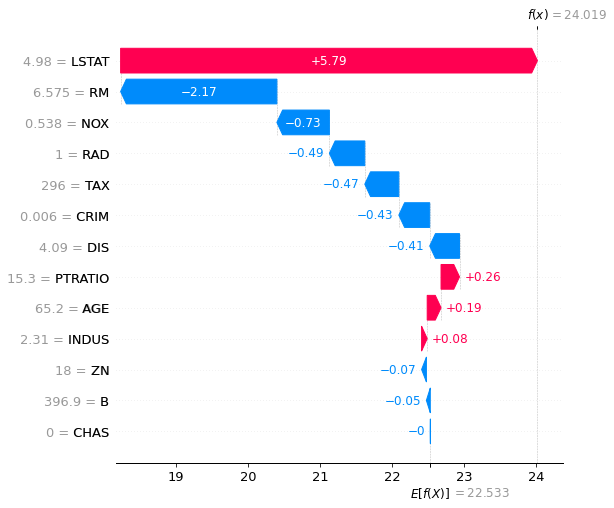

In [5]:
shap.plots.waterfall(shap_values_xgb[0], max_display=13)

## Force plots

In [6]:
shap.initjs() #potrzebne do poniższych wizualizacji

In [7]:
shap.plots.force(shap_values_xgb[0])

Jeśli wziąć wiele force plotów, obrócić je o 90 stopni i ułożyć obok siebie na wykresie, to dostaniemy obraz tego jak zmienne objaśniające wpływają na predykcje na całym zbiorze danych.

In [8]:
shap.plots.force(shap_values_xgb)

In [9]:
shap.plots.force(shap_values_lin)

## Summary plots

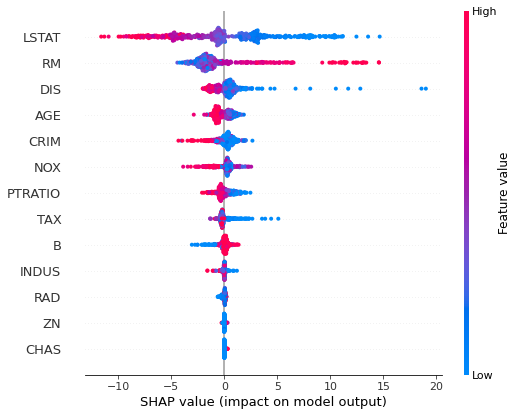

In [10]:
shap.summary_plot(shap_values_xgb)

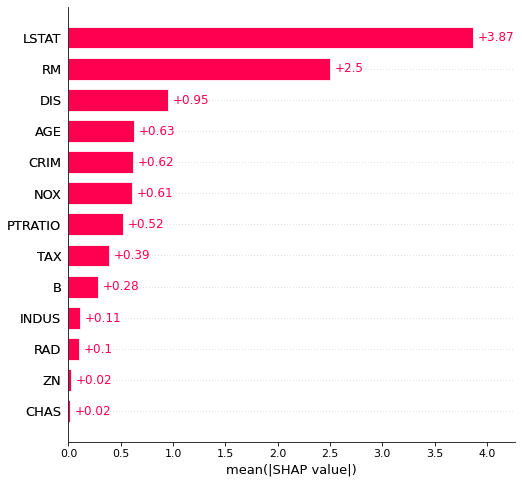

In [11]:
shap.plots.bar(shap_values_xgb, max_display=15)

## Interakcje

Typowym sposobem na zrozumienie jak pojedyncza zmienna objaśniająca wpływa na predykcje, jest przedstawienie na wykresie jej wartości SHAP w zależności od wartości jakie przyjmuje. Duże rozproszenie między wartościami SHAP dla podobnych obserwacji oznacza istnienie interakcji między tą zmienną a pozostałymi. 
<br> <br>
W celu sprawdzenie, z którymi dokładnie zmiennymi te interakcje występują, można wspomniany wykres pokolorować w zależności od wartości innej zmiennej. 
<br> <br>
Poniższy wykres ilustruje ten zabieg dla sprawdzenia interakcji między zmiennymi **average number of rooms** i **crime rate**. Widzimy, że szczególnie dla average no of roooms w przedziale $[5,7]$, rozproszenie wartości SHAP jest wyraźne i że te wartości zależą od crime rate, co sugeruje istnienie interakcji.

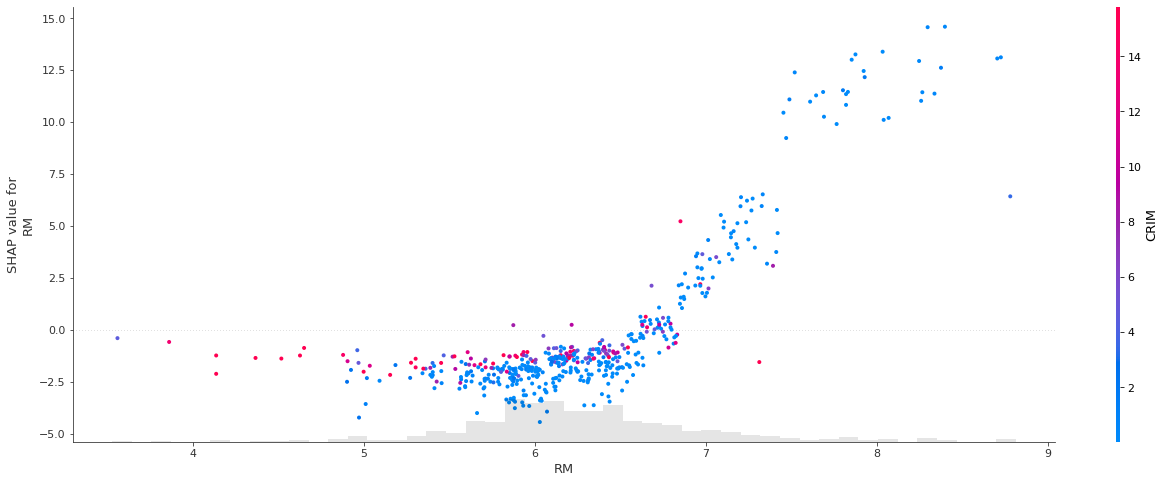

In [12]:
plt.rcParams['figure.figsize'] = [22,8]
fig, ax = plt.subplots()
shap.plots.scatter(shap_values_xgb[:,"RM"], color=shap_values_xgb[:,"CRIM"], ax=ax)

Jeśli nie wyszczególnie się zmiennej objaśniającej w argumencie color, to funkcja plots.scatter() dobierze tą, której interakcja z average no of rooms jest najsilniejsza:

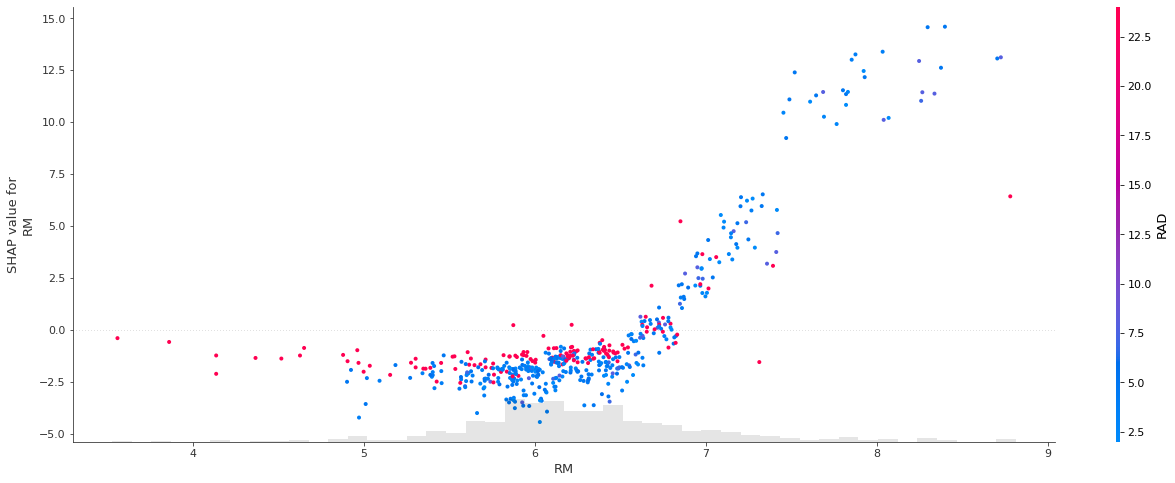

In [13]:
fig, ax = plt.subplots()
shap.plots.scatter(shap_values_xgb[:,"RM"], color=shap_values_xgb, ax=ax)

Można też policzyć wartości SHAP dla par zmiennych objaśniających i w ten sposób wykryć interakcje:

In [14]:
shap_interaction = explainer_xgb.shap_interaction_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


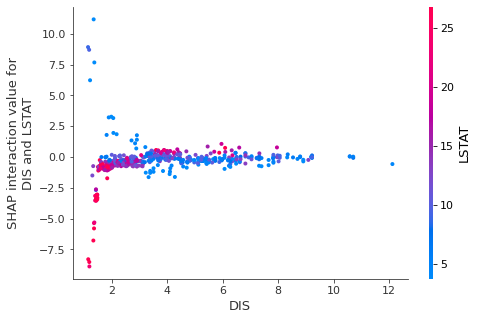

In [18]:
shap.dependence_plot(("DIS", "LSTAT"), shap_interaction, X, display_features=X)

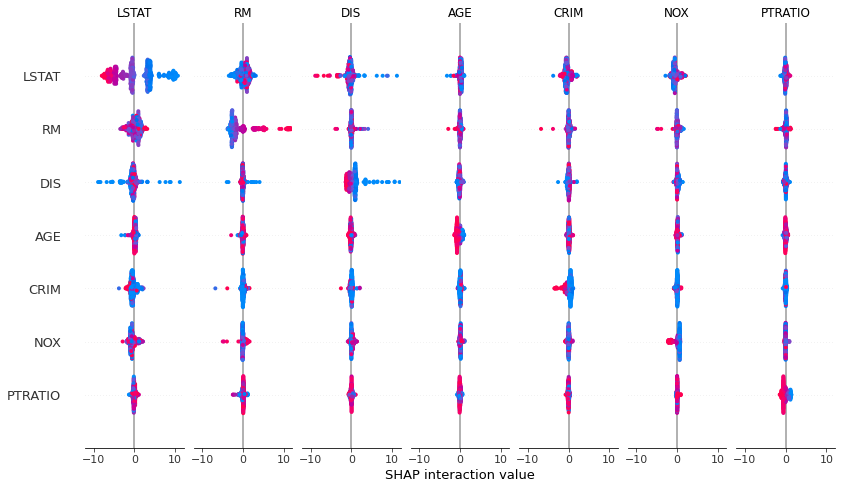

In [16]:
shap.summary_plot(shap_interaction, X)